In [1]:
import scipy as sp
import scipy.interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import athplot
import numpy as np
import os
import importlib
os.chdir("/home/astrosun/jtlaune/athena/")
from mpl_styles import analytic
%matplotlib widget
import yt
yt.set_log_level("error")
importlib.reload(athplot)

<module 'athplot' from '/home/astrosun/jtlaune/athena/athplot.py'>

# Mesh

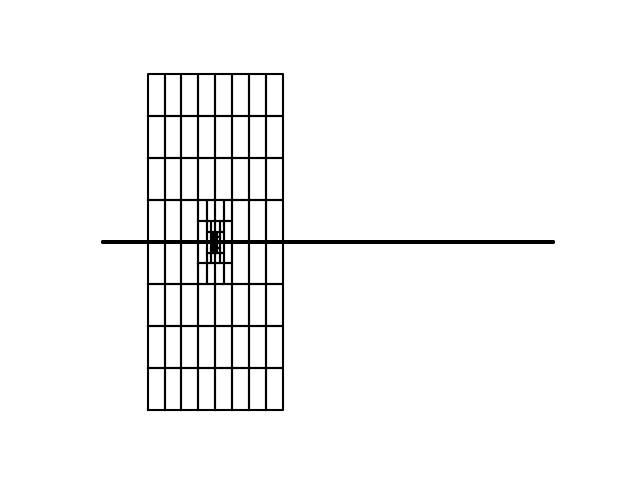

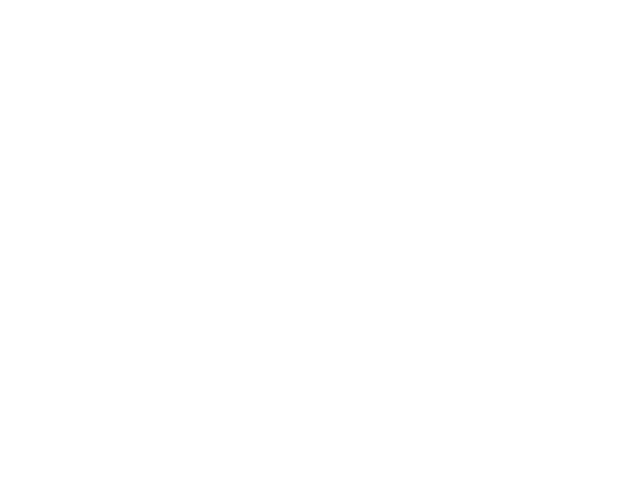

In [3]:
%run -i vis/python/plot_mesh.py -i work/smr5_noAcc/mesh_structure.dat -o show

# 2D plots

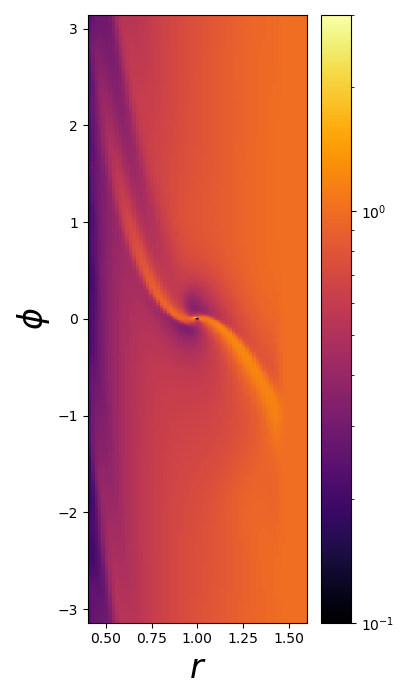

In [32]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/athena/work/type2-linext/accrete/ppd_cyl.out1.00200.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(4):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.1, vmax=3))
cb = plt.colorbar(im)
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()

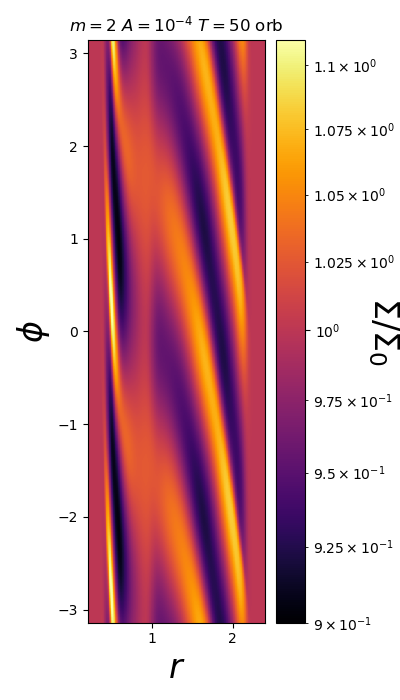

In [ ]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/athena/work/m-wave/testing/ppd_cyl.out1.00100.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(1):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.9, vmax=1.11))
cb = plt.colorbar(im)
cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$",rotation=270,fontsize=24)
ax.set_title(r"$m=2$ $A=10^{-4}$ $T=50$ orb")
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()

# Torque magnitudes over time

(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='$T/(2\\pi\\Omega^{-1})$', ylabel='$\\Gamma/(M_pR_0^2\\Omega^2)$'>)

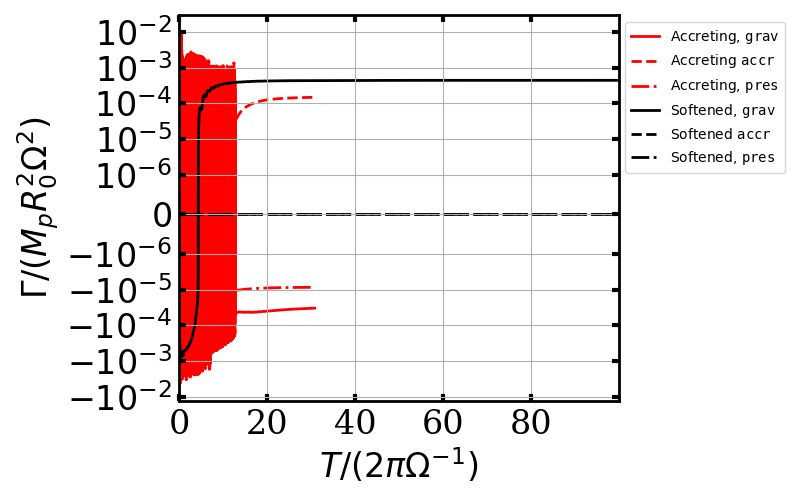

/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)


In [22]:
from matplotlib import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import athplot
import importlib
importlib.reload(athplot)
acc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/smr4_gfexcFix/ppd_cyl.hst")
fig, ax = acc.plotGravTorq("Accreting",symlog=True,linthresh=1e-6,c="r")
noAcc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/smr4_noAcc/ppd_cyl.hst")
noAcc.plotGravTorq("Softened",symlog=True,linthresh=1e-6,figax=(fig,ax))

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='$T/(2\\pi\\Omega^{-1})$', ylabel='$\\Gamma/(M_pR_0^2\\Omega^2)$'>)

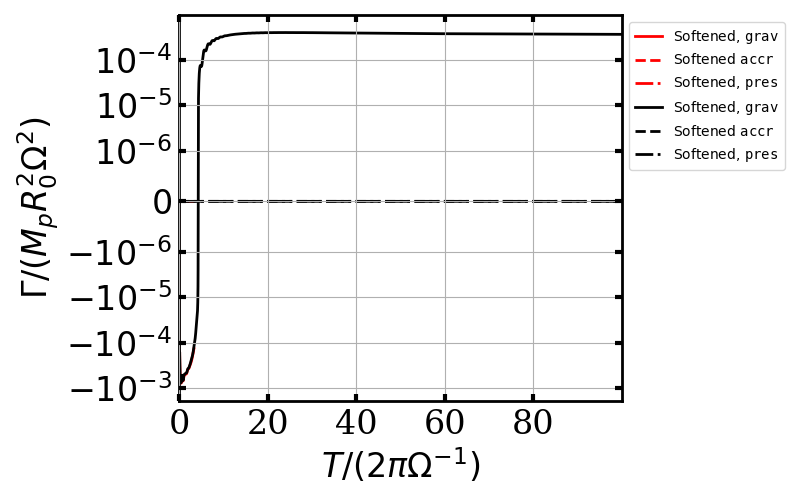

In [15]:
noAcc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/smr4_noAcc/ppd_cyl.hst")
noAcc_nx128 = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/smr4_noAcc_nx128_ny384/ppd_cyl.hst")
fig, ax = noAcc.plotGravTorq("Softened",symlog=True,linthresh=1e-6,c="r")
noAcc_nx128.plotGravTorq("Softened",symlog=True,linthresh=1e-6,figax=(fig,ax))

# Density profiles over time

yt : [WARNING  ] 2023-05-21 19:11:20,878 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:20,878 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:20,879 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:20,879 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:20,909 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:20,910 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:20,910 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:20,911 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:20,911 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:21,912 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:21,912 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:21,913 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:21,913 Assuming 1.0 = 1.0 K
yt :

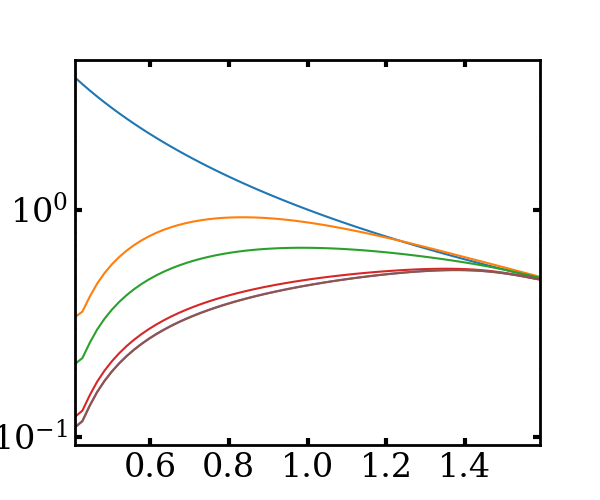

In [25]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4_noPlanet/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

yt : [WARNING  ] 2023-05-21 19:11:27,852 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:27,852 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:27,853 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:27,854 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:27,883 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:27,884 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:27,884 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:27,885 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:27,885 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:28,827 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:28,828 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:28,828 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:28,829 Assuming 1.0 = 1.0 K
yt :

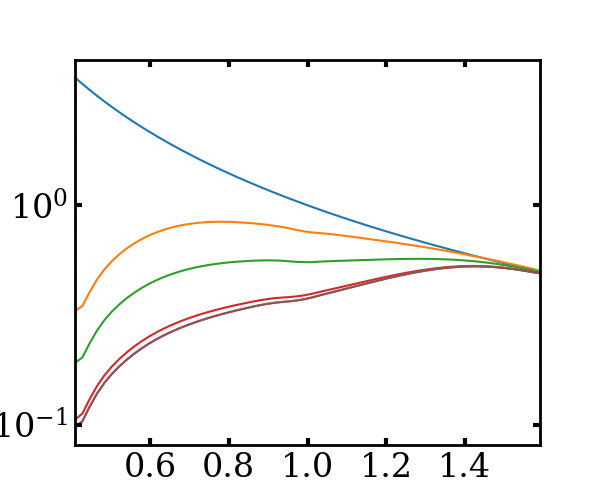

In [26]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

yt : [WARNING  ] 2023-05-21 19:11:34,702 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:34,702 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:34,703 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:34,703 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:34,733 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:34,733 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:34,734 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:34,734 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:34,735 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:35,617 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:35,618 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:35,619 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:35,619 Assuming 1.0 = 1.0 K
yt :

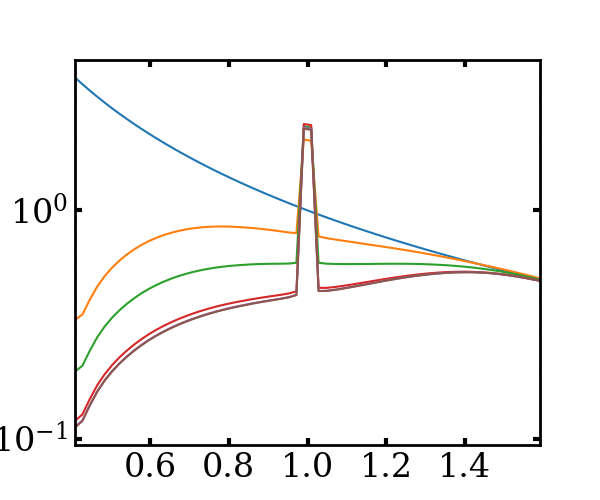

In [27]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4_noAcc/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

# $\dot M$ profiles

/tmp/ipykernel_23847/2577783910.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(8,5))


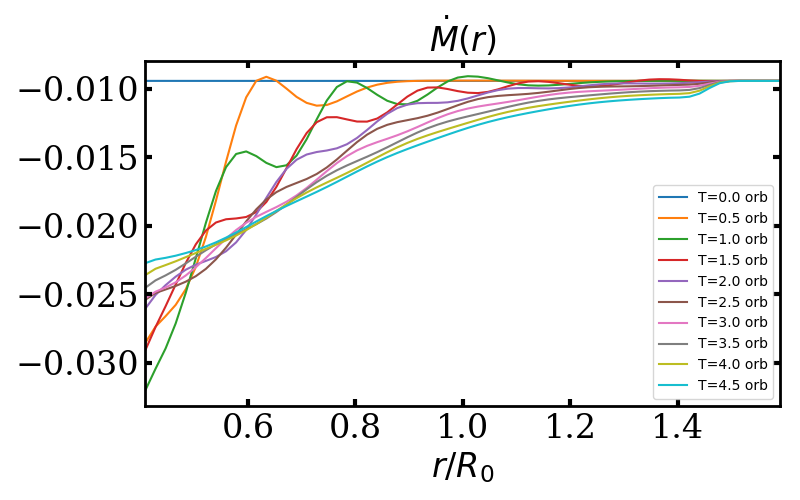

In [23]:
importlib.reload(athplot)
data_dir = "/home/astrosun/jtlaune/athena/work/type2-linext/no_planet/"
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(8,5))
for iout in range(0,10):
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file,data_dir,force=False)
    profs = hdf5.load()
    ax.plot(profs["rMidpts"],profs["Mdot"],label=f"T={iout*0.5} orb")
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
#ax.set_yscale("log")
ax.legend()
ax.set_title(r"$\dot M(r)$",fontsize=24)
ax.set_xlabel(r"$r/R_0$")
fig.tight_layout()

In [13]:
0.001/3/np.pi

0.0001061032953945969

# Testing amr profiles

In [27]:
def interp(iout):
    data_dir = "/home/astrosun/jtlaune/athena/work/type2-powlaw/accrete/"
    ds = yt.load(os.path.join(data_dir, f"ppd_cyl.out1.{iout:05}.athdf"))
    dd = ds.all_data()
    r = np.linspace(0.4, 1.6, 1024 + 1)
    p = np.linspace(-np.pi, np.pi, 6144 + 1)
    r = (r[:-1] + r[1:]) / 2
    RR, PP = np.meshgrid(r, p)
    densInterp = sp.interpolate.griddata(
        (np.array(dd.fcoords[:, 0]), np.array(dd.fcoords[:, 1])),
        np.array(dd["athena_pp", "dens"]),
        (RR.flatten(), PP.flatten()),
        method="nearest",
    )
    vrInterp = sp.interpolate.griddata(
        (np.array(dd.fcoords[:, 0]), np.array(dd.fcoords[:, 1])),
        np.array(dd["athena_pp", "mom1"]) / np.array(dd["athena_pp", "dens"]),
        (RR.flatten(), PP.flatten()),
        method="nearest",
    )
    return (RR, PP, densInterp.reshape(RR.shape), vrInterp.reshape(RR.shape))

In [28]:
RR1, PP1, densInterp1, vrInterp1 = interp(0)
RR2, PP2, densInterp2, vrInterp2 = interp(200)

In [41]:
print(RR1[0,:].shape)

(1024,)


In [4]:
print(vrInterp2)

[[-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 ...
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]]


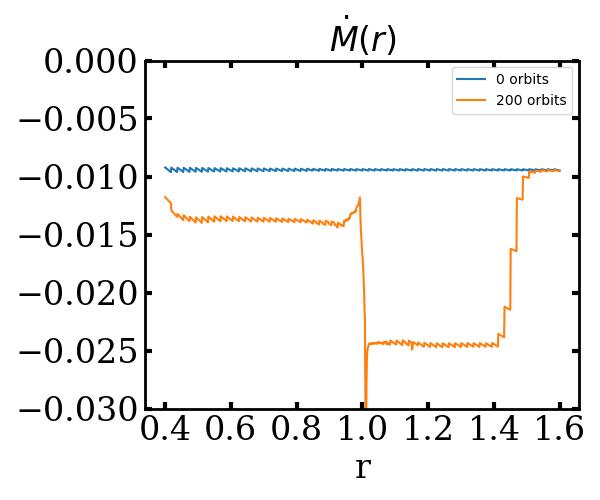

In [29]:
with mpl.rc_context(analytic): fig,ax = plt.subplots()
ax.plot(RR1[0,:],2*np.pi*np.mean(RR1*vrInterp1*densInterp1,axis=0),label=r"0 orbits")
ax.plot(RR2[0,:],2*np.pi*np.mean(RR2*vrInterp2*densInterp2,axis=0),label=r"200 orbits")
ax.set_xlabel("r",fontsize=24)
ax.set_title(r"$\dot M(r)$",fontsize=24)
ax.legend()
ax.set_ylim((-0.03,0))
fig.tight_layout()

In [44]:
fig.tight_layout()

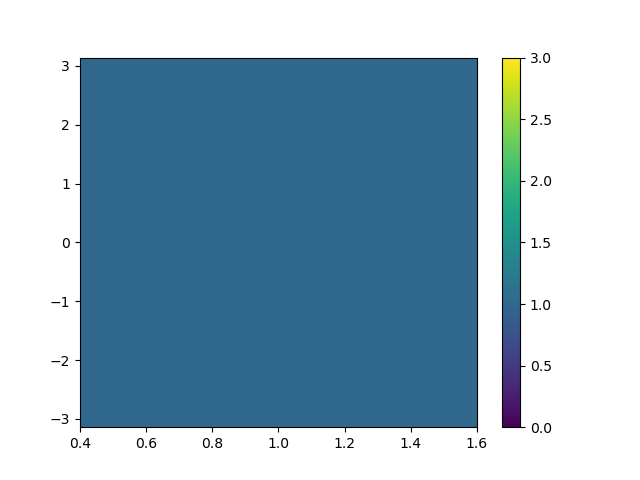

In [10]:
fig, ax = plt.subplots()
cs = ax.pcolormesh(RR2,PP2,densInterp2,vmin=0,vmax=3)
plt.colorbar(cs)

In [33]:
densInterp = densInterp.reshape(RR.shape)
vrInterp = vrInterp.reshape(RR.shape)

In [34]:
#fig,ax = plt.subplots()
ax.plot(r,2*np.pi*np.mean(RR*vrInterp*densInterp,axis=1))

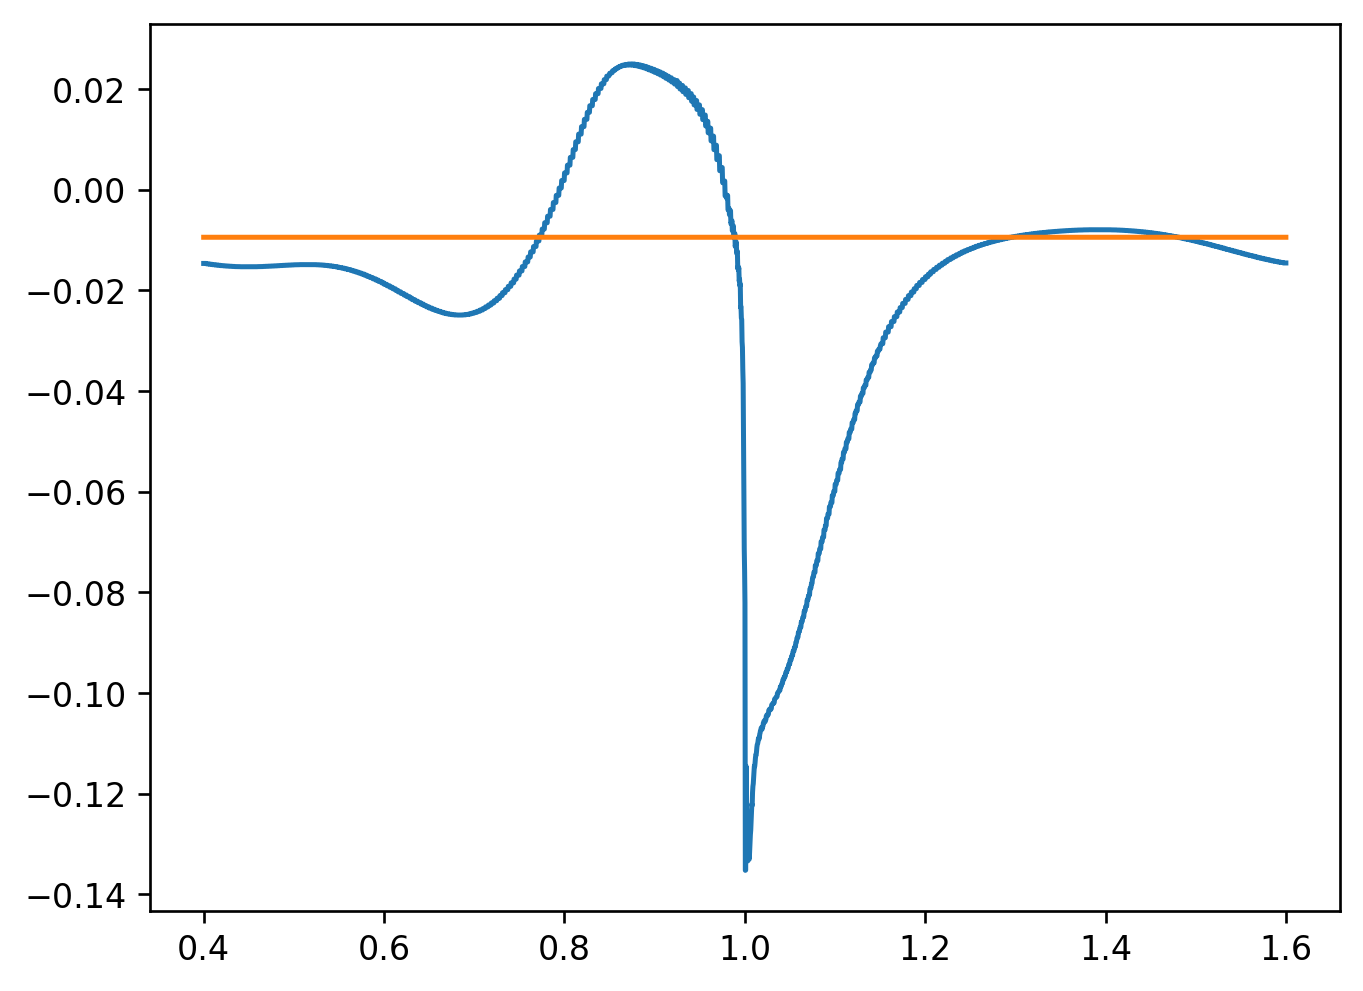

In [35]:
fig

In [ ]:

        dens_data = np.array(dd["athena_pp", "dens"])
        vr_data = np.array(dd["athena_pp", "mom1"]) / dens_data
        vphi_data = np.array(dd["athena_pp", "mom2"]) / dens_data
        # coords are cell-centered
        coords = np.array(dd.fcoords)
        # widths of cells
        fwidths = np.array(dd.fwidth)